In [52]:
import pandas as pd
import jacinle
from tqdm import tqdm
import soundfile as sf
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [11]:
filepaths = jacinle.io.lsdir('../../data/backup/raw/CowenEtAlMeanRatings/*.csv')

for filepath in filepaths:
    df = pd.read_csv(filepath)
    df = df.rename(columns={'Unnamed: 0': 'filename'})
    df = df.sort_values(by=['filename'])
    df = df.reset_index()
    df.to_csv(f'../../data/label/{filepath.split("/")[-1]}', index=False)

In [48]:
df.head()

,filename,amusing,angry,annoying,anxious/tense,awe-inspiring/amazing,beautiful,bittersweet,calm/relaxing/serene,compassionate/sympathetic,...,joyful/cheerful,nauseating/revolting,painful,proud/strong,romantic/loving,sad/depressing,scary/fearful,tender/longing,transcendent/mystical,triumphant/heroic
index,,,,,,,,,,,,,,,,,,,,,
0,01 - Tree Dance&1.mp3,0.055556,0.00000,0.11111,0.055556,0.111110,0.277780,0.055556,0.500000,0.22222,...,0.055556,0.000000,0.00000,0.00000,0.111110,0.055556,0.00000,0.11111,0.055556,0.00000
1,04F4xlWSFh0_18.mp3,0.055556,0.00000,0.16667,0.222220,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.055556,0.11111,0.33333,0.000000,0.000000,0.11111,0.00000,0.000000,0.11111
2,04F4xlWSFh0_75.mp3,0.000000,0.22222,0.22222,0.166670,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.055556,0.111110,0.22222,0.33333,0.000000,0.000000,0.22222,0.00000,0.000000,0.16667
3,05UApr2UQHQ_227.mp3,0.111110,0.00000,0.00000,0.111110,0.111110,0.166670,0.000000,0.166670,0.00000,...,0.000000,0.055556,0.00000,0.00000,0.055556,0.000000,0.00000,0.00000,0.000000,0.00000
4,073TNjLc070_40.mp3,0.111110,0.00000,0.16667,0.000000,0.055556,0.055556,0.000000,0.055556,0.11111,...,0.222220,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.166670,0.00000


In [47]:
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    y, sr = sf.read(f'../../data/backup/raw/Verified_Normed/{row.filename}')
    sf.write(f'../../data/wav/{str(row.name).zfill(4)}.wav', y, sr)

100%|██████████| 1841/1841 [00:14<00:00, 126.79it/s]


In [22]:
idf = df[['index', 'filename']].copy()
idf['length'], idf['sr'] = 0, 0
idf.head()

,index,filename,length,sr
0,0,01 - Tree Dance&1.mp3,0,0
1,1,04F4xlWSFh0_18.mp3,0,0
2,2,04F4xlWSFh0_75.mp3,0,0
3,3,05UApr2UQHQ_227.mp3,0,0
4,4,073TNjLc070_40.mp3,0,0


In [23]:
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    y, sr = librosa.load(f'../../data/wav/{row.filename[:-4]}.wav')
    idf.at[i, 'length'], idf.at[i, 'sr'] = len(y), sr

100%|██████████| 1841/1841 [03:15<00:00,  9.42it/s]


In [26]:
idf['time'] = np.around(idf['length'] / idf['sr'])

In [27]:
idf.describe()

,index,length,sr,time
count,1841.000000,1841.000000,1841.0,1841.000000
mean,920.000000,111553.510049,22050.0,5.002716
std,531.595241,5573.555976,0.0,0.258535
min,0.000000,15360.000000,22050.0,1.000000
25%,460.000000,111616.000000,22050.0,5.000000
50%,920.000000,111616.000000,22050.0,5.000000
75%,1380.000000,111616.000000,22050.0,5.000000
max,1840.000000,173568.000000,22050.0,8.000000


In [29]:
sidf = idf[idf['time'] == 5]
sidf.describe()

,index,length,sr,time
count,1809.000000,1809.000000,1809.0,1809.0
mean,922.791598,111521.777778,22050.0,5.0
std,533.310723,723.853528,0.0,0.0
min,0.000000,100360.000000,22050.0,5.0
25%,459.000000,111616.000000,22050.0,5.0
50%,923.000000,111616.000000,22050.0,5.0
75%,1387.000000,111616.000000,22050.0,5.0
max,1840.000000,121266.000000,22050.0,5.0


In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(sidf, test_size=0.2)
train.head()

,index,filename,length,sr,time
177,177,3nmxBiZQTvg_0.mp3,111104,22050,5.0
499,499,Disclosure - You & Me (Flume Remix)-OUkkaqSNdu...,111122,22050,5.0
344,344,9wfpXI5PKlw_75.mp3,111616,22050,5.0
1701,1701,t7IPcgksDQM_28.mp3,111104,22050,5.0
1514,1514,jDNkHl6cToo_35.mp3,111616,22050,5.0


In [63]:
df = pd.read_csv('../../data/label/MeanCategoryRatingsUSA.csv')
df = df.set_index('index')
df.head()

,filename,amusing,angry,annoying,anxious/tense,awe-inspiring/amazing,beautiful,bittersweet,calm/relaxing/serene,compassionate/sympathetic,...,joyful/cheerful,nauseating/revolting,painful,proud/strong,romantic/loving,sad/depressing,scary/fearful,tender/longing,transcendent/mystical,triumphant/heroic
index,,,,,,,,,,,,,,,,,,,,,
0,01 - Tree Dance&1.mp3,0.055556,0.00000,0.11111,0.055556,0.111110,0.277780,0.055556,0.500000,0.22222,...,0.055556,0.000000,0.00000,0.00000,0.111110,0.055556,0.00000,0.11111,0.055556,0.00000
1,04F4xlWSFh0_18.mp3,0.055556,0.00000,0.16667,0.222220,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.055556,0.11111,0.33333,0.000000,0.000000,0.11111,0.00000,0.000000,0.11111
2,04F4xlWSFh0_75.mp3,0.000000,0.22222,0.22222,0.166670,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.055556,0.111110,0.22222,0.33333,0.000000,0.000000,0.22222,0.00000,0.000000,0.16667
3,05UApr2UQHQ_227.mp3,0.111110,0.00000,0.00000,0.111110,0.111110,0.166670,0.000000,0.166670,0.00000,...,0.000000,0.055556,0.00000,0.00000,0.055556,0.000000,0.00000,0.00000,0.000000,0.00000
4,073TNjLc070_40.mp3,0.111110,0.00000,0.16667,0.000000,0.055556,0.055556,0.000000,0.055556,0.11111,...,0.222220,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.166670,0.00000


In [64]:
sidf[['index']].join(df).drop(columns=['filename']).to_csv('../../data/all.csv', index=False)

In [65]:
sidf.head()

,index,filename,length,sr,time
0,0,01 - Tree Dance&1.mp3,112312,22050,5.0
2,2,04F4xlWSFh0_75.mp3,111104,22050,5.0
4,4,073TNjLc070_40.mp3,111104,22050,5.0
6,6,0HDdjwpPM3Y_10.mp3,111616,22050,5.0
7,7,0QBx-TRKhVs_25.mp3,111616,22050,5.0


  0%|          | 0/1809 [00:00<?, ?it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[ 0.0073899   0.01361584  0.01315012 ... -0.01720091 -0.00528951
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  0%|          | 1/1809 [00:00<05:26,  5.54it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-3.7248244e-06 -1.5864814e-05 -1.5933721e-05 ... -2.7608832e-05
 -1.2307139e-05 -2.2335696e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  0%|          | 2/1809 [00:00<05:11,  5.80it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-1.4198550e-06  1.5366015e-06 -1.6203962e-06 ... -2.2050392e-04
 -2.6037611e-04 -2.7682009

  1%|          | 21/1809 [00:03<05:01,  5.93it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-4.4977828e-06 -1.5486701e-05 -1.5611469e-05 ... -6.3600310e-05
 -7.1614457e-05 -8.2107770e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  1%|          | 22/1809 [00:03<05:01,  5.92it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[ 5.7104682e-08 -4.2440027e-07  1.1562209e-06 ... -5.7696769e-05
 -3.8186645e-06 -6.7665613e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  1%|▏         | 23/1809 [00:03<05:05,  5.84it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-6.9325159e-07  9.6032943e-07 -1.3181369e-06 ... -3.3506367e-

  2%|▏         | 42/1809 [00:07<04:55,  5.97it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-7.7539049e-08 -8.4034589e-08  5.3475890e-07 ... -2.5397951e-05
 -1.4790306e-05 -8.4301291e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  2%|▏         | 43/1809 [00:07<04:54,  6.00it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-3.9823781e-06 -4.6589389e-06 -1.9535893e-05 ... -3.4568154e-06
  1.1783587e-06 -8.2533438e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  2%|▏         | 44/1809 [00:07<04:55,  5.97it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-6.2165409e-06 -3.5227185e-05 -2.0529962e-05 ... -2.2760958e-

  3%|▎         | 63/1809 [00:10<05:09,  5.63it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[0.01294542 0.01744942 0.00941817 ... 0.34180662 0.37969154 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  4%|▎         | 64/1809 [00:11<05:52,  4.95it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[0.03349921 0.05776921 0.06225115 ... 0.16513337 0.22672294 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  4%|▎         | 65/1809 [00:11<05:36,  5.19it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-0.03335569 -0.05453244 -0.05943251 ... -0.00712796 -0.00294592
  0.        ] as keyword args. From version 0.1

  5%|▍         | 84/1809 [00:16<08:11,  3.51it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-1.8257438e-06  2.6450919e-06 -6.0432735e-06 ... -1.5964943e-05
 -7.4972904e-06 -1.5532742e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  5%|▍         | 85/1809 [00:17<08:16,  3.47it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-1.0523305e-05 -1.6631115e-05  3.0058543e-06 ... -3.9863221e-06
 -6.0773123e-06  7.8760124e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  5%|▍         | 86/1809 [00:17<08:14,  3.49it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-3.1581806e-06 -1.7371998e-05 -1.0754436e-05 ...  5.7007277e-

  6%|▌         | 105/1809 [00:22<06:45,  4.21it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-4.42508508e-06 -2.62743361e-05 -3.20860963e-05 ... -1.19503602e-04
 -1.03601196e-04 -2.40681657e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  6%|▌         | 106/1809 [00:22<06:10,  4.59it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[ 2.5681622e-06 -5.2794398e-06 -2.2672966e-05 ... -1.5456406e-05
 -1.4838956e-05 -1.6186019e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  6%|▌         | 107/1809 [00:22<05:44,  4.94it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[ 9.51943946e-07 -1.16967885e-05 -5.81867789e-06 ... 

  7%|▋         | 126/1809 [00:26<05:02,  5.57it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.9992829e-06
 -3.8101089e-06 -1.7112825e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  7%|▋         | 127/1809 [00:26<05:00,  5.61it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-1.8105240e-08  2.0648530e-08 -2.1513785e-08 ... -2.3379815e-05
 -2.0309291e-05 -3.3834480e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)
  7%|▋         | 128/1809 [00:26<05:01,  5.58it/s]/var/folders/dd/ycn3gn197sd9xbwfdr0h1hv40000gn/T/ipykernel_2000/2369468297.py:5: FutureWarning: Pass y=[-4.3730115e-06 -1.5602322e-05 -1.5516405e-05 ... -2.178576

KeyboardInterrupt: 

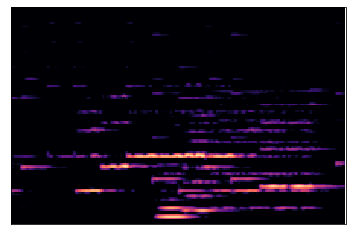

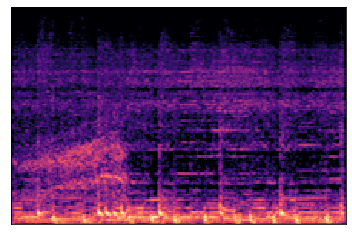

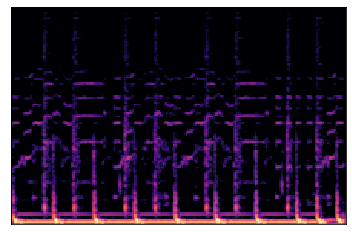

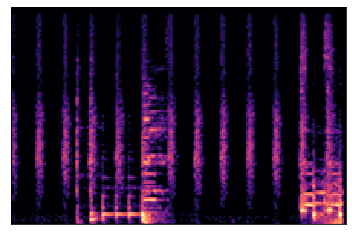

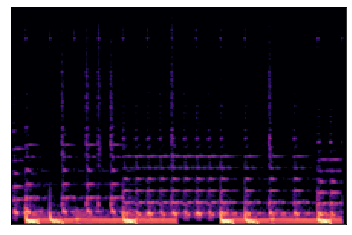

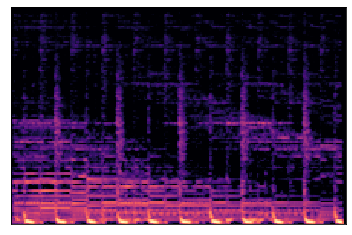

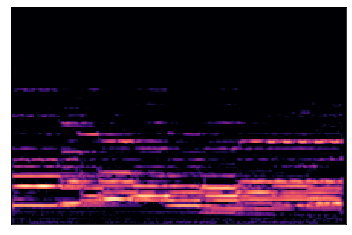

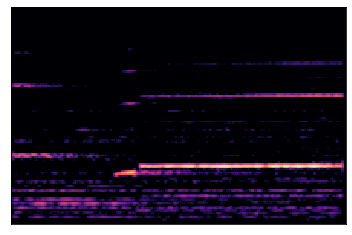

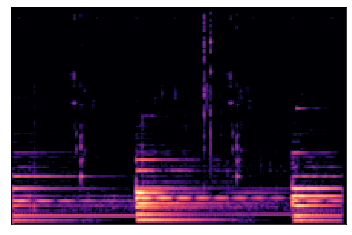

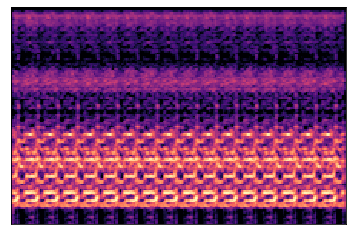

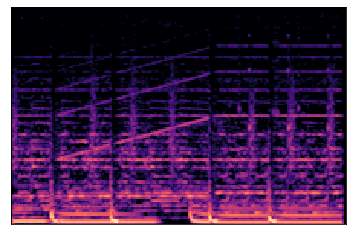

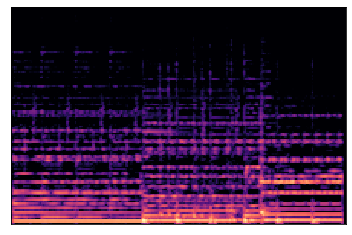

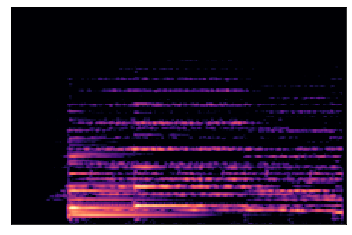

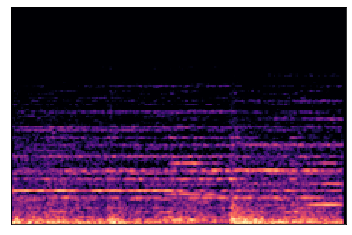

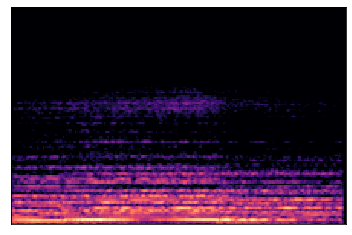

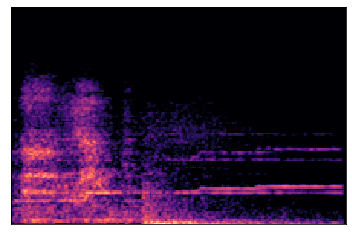

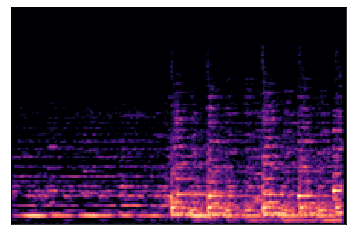

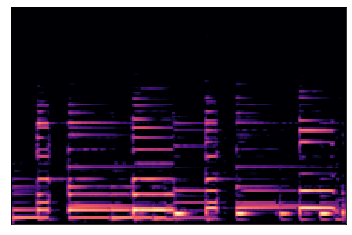

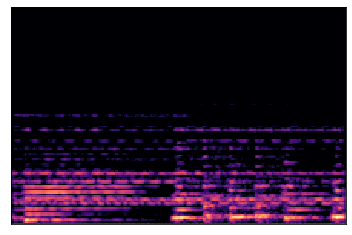

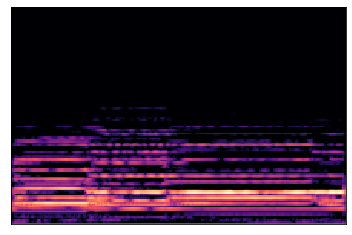

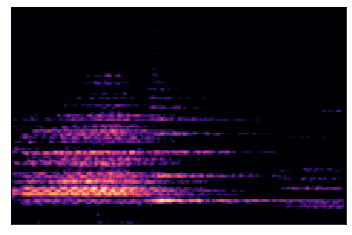

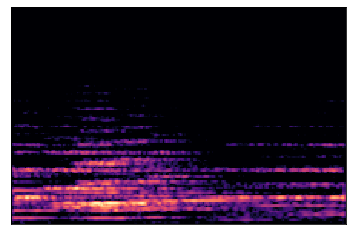

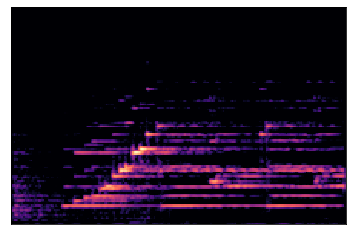

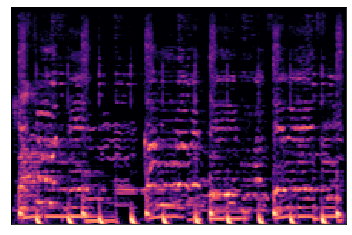

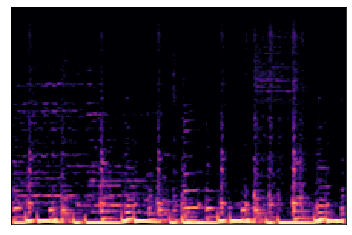

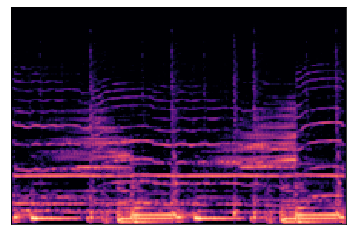

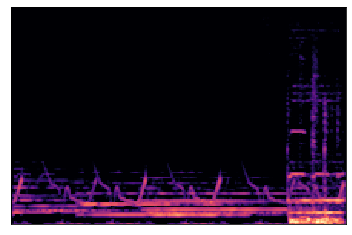

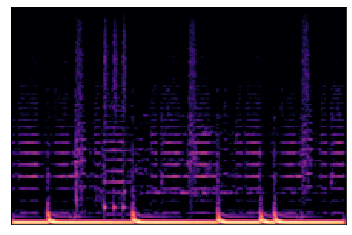

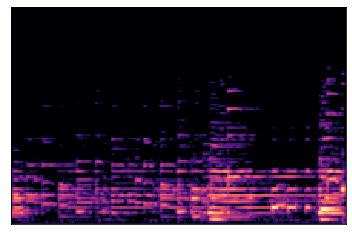

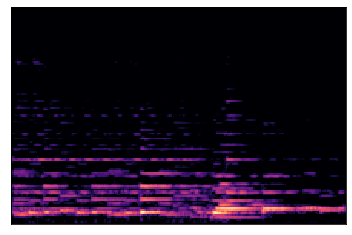

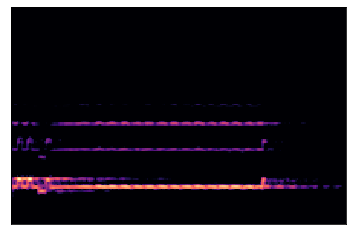

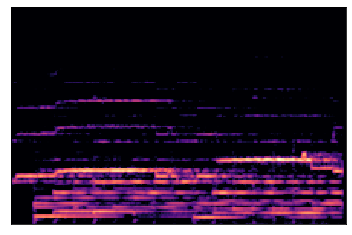

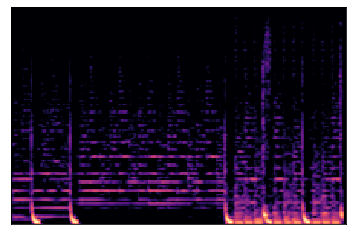

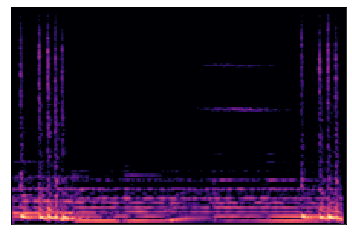

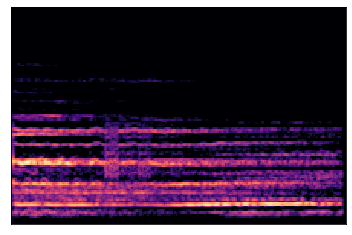

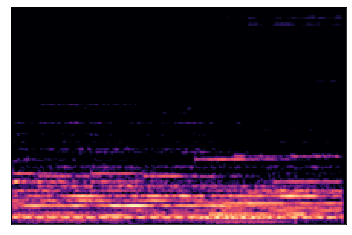

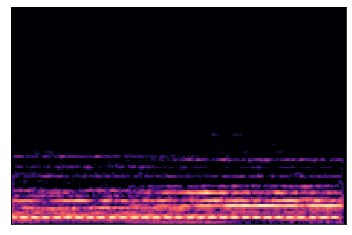

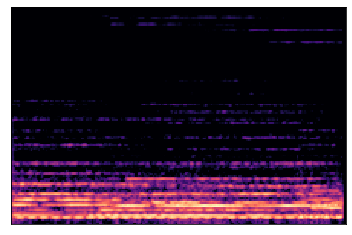

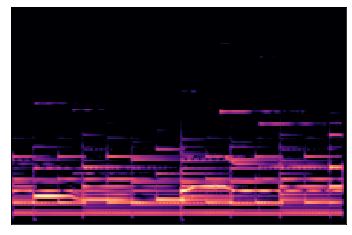

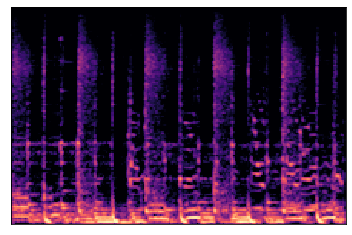

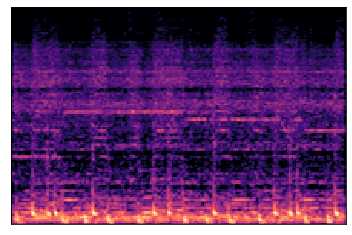

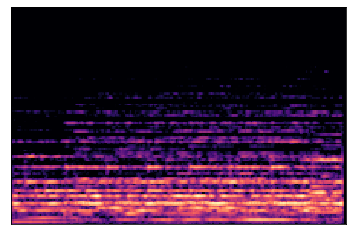

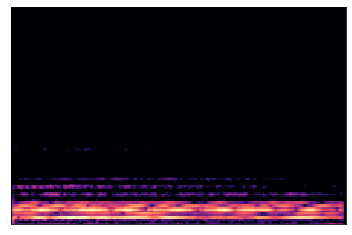

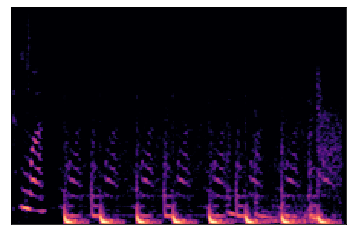

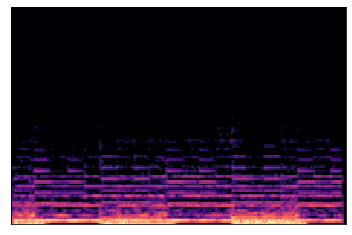

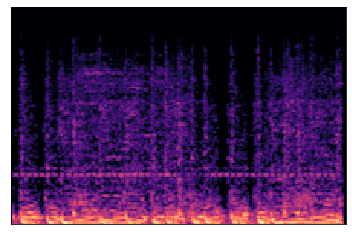

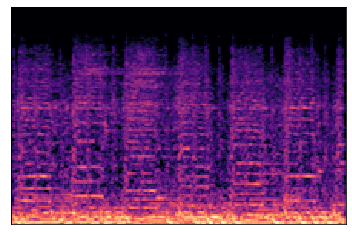

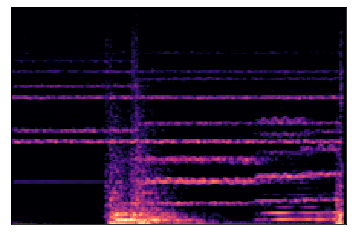

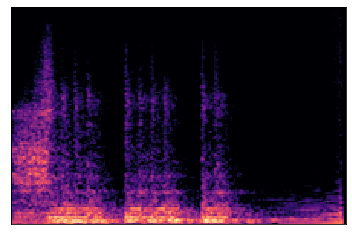

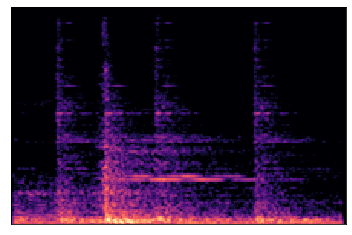

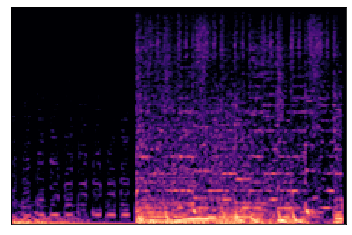

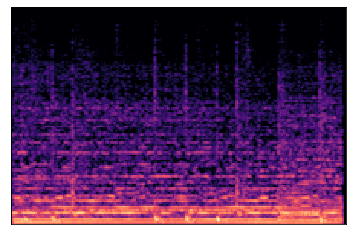

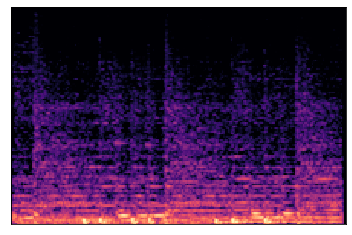

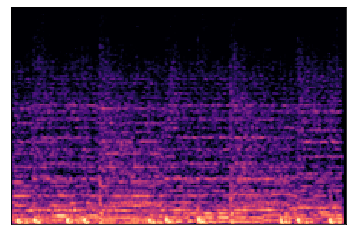

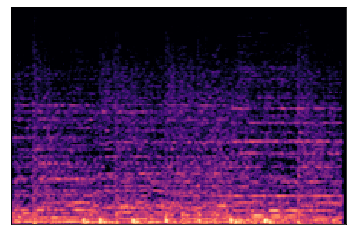

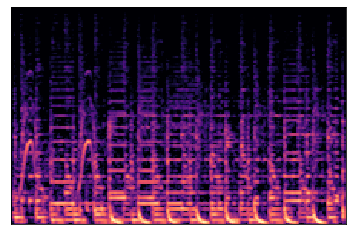

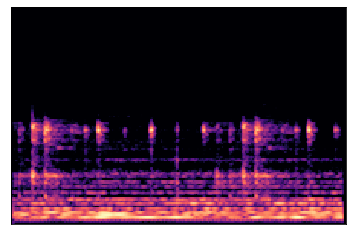

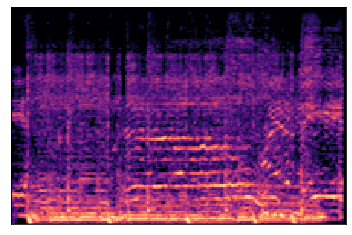

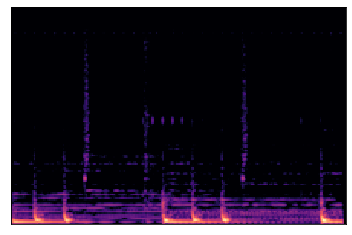

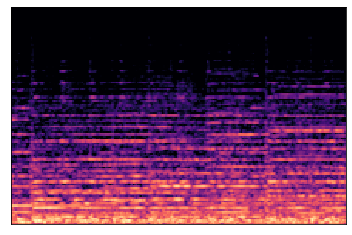

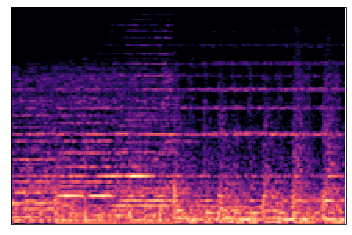

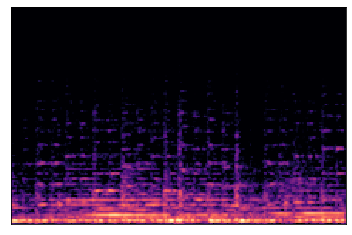

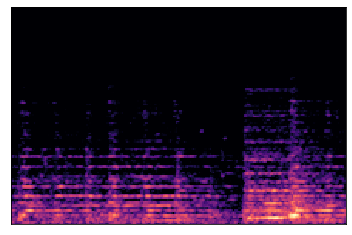

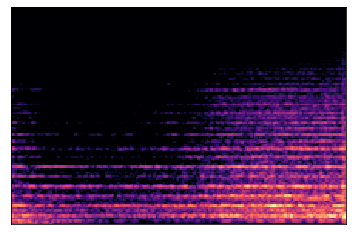

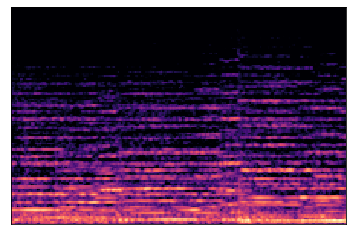

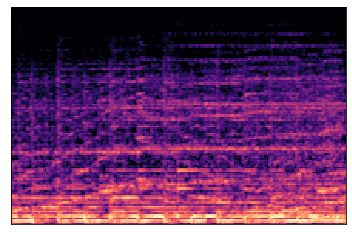

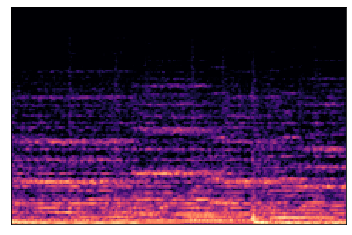

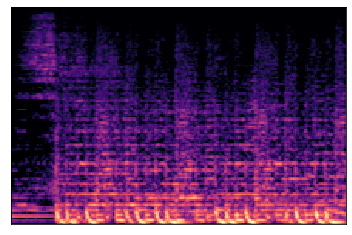

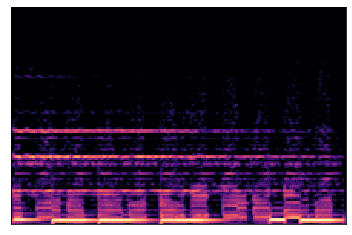

Error in callback <function flush_figures at 0x7fdedcf85d30> (for post_execute):


KeyboardInterrupt: 

In [70]:
for i, row in tqdm(sidf.iterrows(), total=sidf.shape[0]):
    filename = str(row['index']).zfill(4)
    y, sr = librosa.load(f'../../data/wav/{filename}.wav')

    S = librosa.feature.melspectrogram(y, sr=sr)
    S_DB = librosa.amplitude_to_db(S, ref=np.max)

    plt.figure()
    librosa.display.specshow(S_DB, sr=sr, hop_length=512)
    plt.savefig(f'../../data/mel_spec/{filename}.png')

(288, 432, 4)


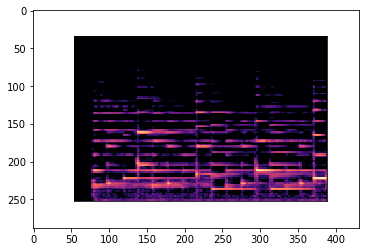

In [60]:
import imageio

img_path = 'tmp.png'
img = imageio.imread(img_path)
print(img.shape)

plt.imshow(img, interpolation='nearest')
plt.show()